# Logistic Regression

## Logistic Regression 모델
> **`Logistic Regression`** 은 **분류**를 위한 **지도학습** 머신러닝 모델이다.  
**종속변수가 이진형 분포**를 보일경우 기존 선형모델로는 해결이 어려움이 있음.  
클래스가 여러개인 분류문제에도 사용이 가능하지만 이진형 데이터(바이너리) 종속변수 분류문제를 해결하는데 주로 사용.  
ex) 남/여, 개/고양이, OK/NG, 햄메일/스팸메일, 승인/반려

<img src="https://drive.google.com/uc?id=10GmOoYLDCvGf7atGImyfyuyeZg2qbU72">

위 그림에서 확인 할 수 있듯 기존 선형모델이 풀기 어려운 이진분류 문제를 해결하고자 선형을 비선형으로 변환한 모델이다.  
만약 모델(함수)의 출력결과를 0과 1사이로 만들어 줄 수 있다면 즉, 확률 문제로서 접근한다면 분류문제에 사용 가능 하겠다는 아이디어에서 변형 되었다.

## Odds (승산비)
- 로지스틱회귀 모델을 확률로서 접근하는데 가장 핵심적인 개념  
  
$$ p : 어떤\ 일이\ 발생할\ 확률\ (승산) $$  
$$ Odds = {p \over {1-p}} : \  어떤\ 일이\ 발생할\ 확률\ / 발생하지\ 않을\ 확률\ (승산비)$$  

> 0 < p < 1  
0 < 1-p < 1  
p가 0에 가까울 경우 0  
p가 1에 가까울 경우 무한대  
  
위의 Odds를 그대로 사용하지 않고 log를 취해 사용하면 0을 기준으로 상호대칭적이며, 계산이 수월한 수식이 완성 됩니다.  
기존 선형회귀식에서 y위치에 log Odds를 적용하면 아래와 같은 식이 되고  
  
$$ log({Y \over {1-Y}}) = \beta_0 + \beta_1x$$  
  
이를 다시 y에 대해 정리하면 sigmoid 식이 됩니다.  
  
$$ y = {1 \over {1+\exp^{-(\beta_0 + \beta_1x)}}} $$  

<img src="https://drive.google.com/uc?id=1Es8gzBJUKirvRLUc17qXdHCrNLX0gghx">

결국 로지스틱 회귀 모델도 $\beta_0$와 $\beta_1$ 를 추정하게 됩니다.
> 0 < sigmoid(x) < 1  
sigmoid(0) = 0.5  
곧 시그모이드 함수를 거친 값을 확률값처럼 생각이 가능해짐

## 모델학습

### cost function

$$ \hat{y} = \begin{cases} 1 & \text{ if } \ h(x) \geq 0.5 \\ 0 & \text{ if } \ h(x) < 0.5 \end{cases} $$

로지스틱 회귀모델의 비용함수는 각 가정에 따른 y의 결과값에 따라 서로 다른 함수를 갖게 됩니다.

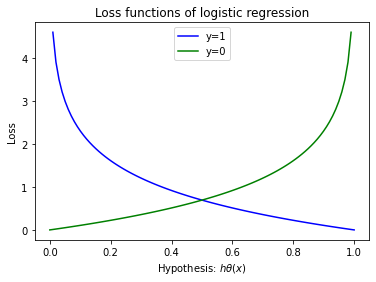

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

x = np.linspace(0, 1, 100)
y1 = 0 - np.log(x)
y0 = 0 - np.log(1 - x)

plt.plot(x, y1, 'b', label='y=1')
plt.plot(x, y0, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss')
plt.legend()
plt.show()

이를 방정식으로 풀어내면 하나의 식으로 정리가 됩니다.

y = 0, y = 1 일 때 식 한쪽이 없어져

$$ cost(h(x),y) = -ylog(h(x)) - (1-y)log(1-h(x)) $$

$$ J(\theta)= \dfrac{1}{N} \sum_{i=1}^N[-y^ilog(h(x^i)) - (1-y^i)log(1-h(x^i))] $$

$$ \dfrac{\partial{J(\theta)}}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^N (h(x^i) - y^i)x_j^i$$

## 모델평가
> 예측모델인 **`linear regression`** 모델의 경우 최소자승법을 통해 모델을 평가하였다.  
분류모델인 **`logistic regression`** 모델은 분류모델 평가 지표를 사용하여 모델을 평가한다.  
대표적인 모델평가 함수인 **오차행렬(confusion matrix)** 와 **분류평가표(classification report)** 를 사용한다.

### 오차행렬(confusion matrix)
<img src="https://drive.google.com/uc?id=1I4gkLs1Kji1UCseSU6rsxfi8Sp5Q0MOe">  
보통 잡아야할 대상을 1로 분류(스팸메일, NG 등)    

행 방향으로 실제, 열 방향으로 예측

TP - True Positive(실제값 1, 예측값 1로 정분류 된 갯수)  
FN - False Negative(실제값 1, 예측값 0으로 오분류 된 갯수)  
FP - Flase Positive(실제값 0, 예측값 1로 오분류 된 갯수)  
TN - True Negative(실제값 0, 예측값 0으로 정분류 된 갯수)

### 정확도(Accuracy) - 전체 샘플 중 모델이 바르게 분류한 비율
<img src="https://drive.google.com/uc?id=1veqNRPag_-PkvGWxDc-1ZPh20L4q9CNB">  

$${TP + TN \over TP + FN + FP + TN}$$

### 정밀도(Precision) - 모델이 positive로 분류한 것 중 실제값이 positive이 비율
모수가 예측값
<img src="https://drive.google.com/uc?id=1_JVlZ1KGklpCQF_uiZnp4Wli7leJdPvK">  

$${TP \over TP + FP}$$

### 재현율(Recall, Sensitivity) - 실제값이 positive인 것 중 모델이 positive라 분류한 비율
ex) 실제 암인데 정상으로 판별한 경우,, risk가 큼..! => risk가 큰 것이 가장 중요한 평가 지표  
ex) 핸드폰 지문 인식(잡아야하는 대상: 나). 보안(precision) vs 인식률(recall). 비즈니스 모델에 따라 중요한 지표가 다름
<img src="https://drive.google.com/uc?id=1dkUFhBtLyivJayOOppjUsU07a10Rh0Fi">  

$${TP \over TP + FN}$$

### f1-score - precision과 recall의 조화평균
risk가 크지 않은 모델에서 많이 사용. precision/recall 구분하지 않고 둘다 녹여씀
<img src="https://drive.google.com/uc?id=1tB56v7-P5S5_sFOcxrzEthq3-qyDB7hH">    

$${2 * precision * recall \over precision + recall}$$  

## 로지스틱회귀 실습

In [2]:
# 필요모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn 유방암 데이터셋 활용
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
# 데이터 로드
# cancer
# dictionary type으로 저장. 'data'가 설명변수, 'target'이 종속변수
print(cancer['DESCR'])
# class 확인: Malignant(0, 악성), Benign(1, 음성)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [12]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
# 로딩 데이터 확인
y = cancer['target']
X = cancer['data']
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
# 데이터프레임 제작
X = pd.DataFrame(X, columns=cancer['feature_names'])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# 훈련과 테스트셋에서의 레이블의 분포가 동일하게 하라. (stratify=label)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [18]:
# 모델 import
from sklearn.linear_model import LogisticRegression

In [19]:
# 모델 생성
model = LogisticRegression()
# L2 penalty 기본 적용.. 설명변수 개수가 많을 때 coef의 영향력을 줄여서 과적합 해결하기 위함

<img src="https://drive.google.com/uc?id=1qWctLCSnb-gCVbr0jq-jp318bEaAWn2u">

로지스틱회귀에서 방법론 변경 가능   
패널티 종류) 다항식/OVR + L1/L2 penalty. 로지스틱회귀 안에 solvers 기입

In [38]:
# 모델 훈련
model.fit(X_train, y_train)
# 로지스틱회귀분석 L2 penalty 기본 적용,, 패널티 있으면 미분이 안되는 지점이 있어서 아래 경고 메세지 나옴

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# 모델 예측
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
# 예측 확률값 확인
model.predict_proba(X_test)

array([[1.07882448e-02, 9.89211755e-01],
       [9.99170771e-01, 8.29229277e-04],
       [1.53561183e-01, 8.46438817e-01],
       [9.30536125e-02, 9.06946388e-01],
       [1.52573607e-01, 8.47426393e-01],
       [9.99999977e-01, 2.26571947e-08],
       [7.87168943e-01, 2.12831057e-01],
       [9.99999609e-01, 3.90777199e-07],
       [9.99124796e-01, 8.75203808e-04],
       [2.66652868e-03, 9.97333471e-01],
       [4.52467657e-01, 5.47532343e-01],
       [1.45925325e-03, 9.98540747e-01],
       [9.99999993e-01, 6.81773581e-09],
       [9.99999975e-01, 2.46422559e-08],
       [1.15622255e-01, 8.84377745e-01],
       [2.79182047e-03, 9.97208180e-01],
       [9.99999999e-01, 7.68557680e-10],
       [6.10034159e-01, 3.89965841e-01],
       [7.73827210e-02, 9.22617279e-01],
       [7.73036173e-04, 9.99226964e-01],
       [9.99999792e-01, 2.07515057e-07],
       [9.93518037e-01, 6.48196303e-03],
       [1.24598319e-02, 9.87540168e-01],
       [6.94014468e-03, 9.93059855e-01],
       [3.321250

In [48]:
np.median(model.predict_proba(X_test)[0])

0.5

In [39]:
# 모델 평가
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[49  4]
 [ 1 89]]


In [30]:
# 오분류 보고서 출력
print(classification_report(y_test, y_pred))   # support는 개수

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



=> 0번 class의 recall값(양성인데 음성으로 판단하는 경우)을 줄이는 방향으로 모델 개선 필요

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
# 1번 class에 대한 값
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.956989247311828
0.9888888888888889
0.9726775956284154


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, y_pred)

0.9567085953878407

In [56]:
print(roc_curve(y_test, y_pred))

(array([0.       , 0.0754717, 1.       ]), array([0.        , 0.98888889, 1.        ]), array([2, 1, 0]))


수학 공식을 간편하게 입력하기 위한 TeX 문법
https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:TeX_%EB%AC%B8%EB%B2%95